## Neuron activation functions

To activate neuron based on a specific input the logical functions have to be used like:
- hiperbolical tangens
- SoftSign
- ReLU - Restifier Linear Unit
- ELU - Exponential Linear Unit
- SELU - Scaled Exponential
- Softmax - multi-class classification

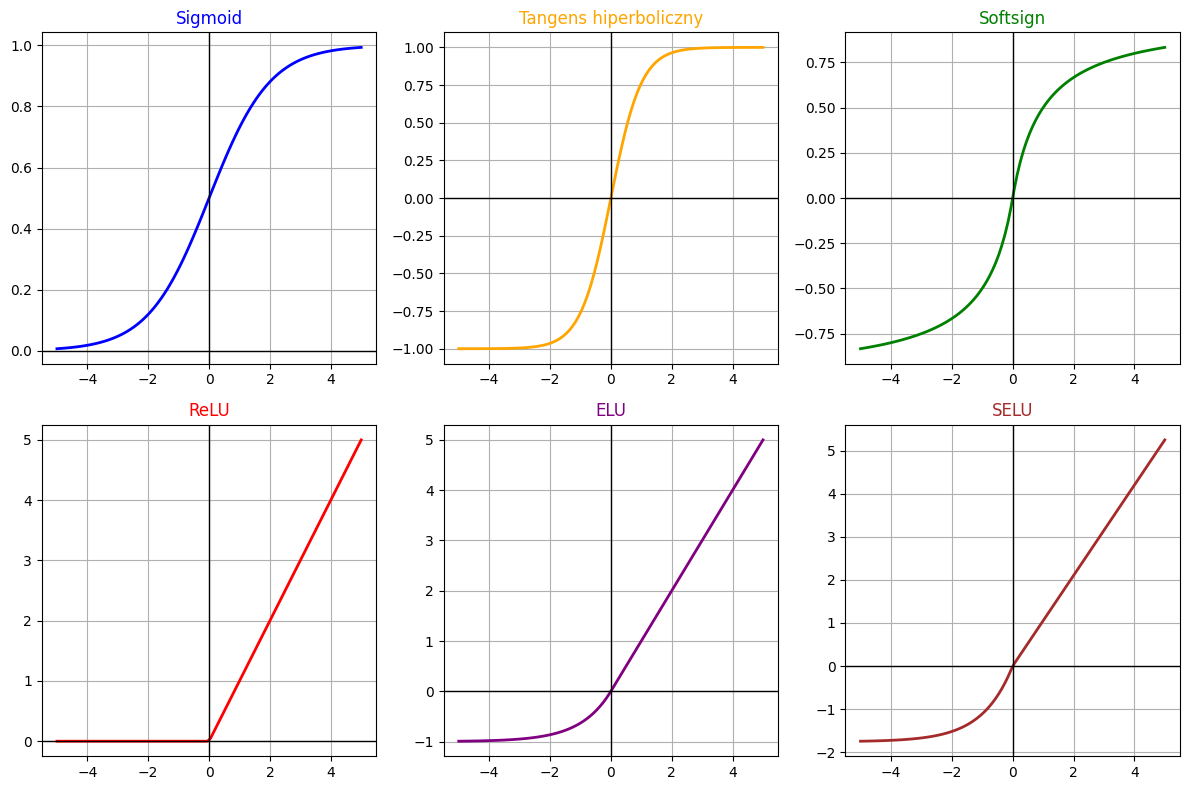

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of activation functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softsign(x):
    return x / (1 + np.abs(x))

def relu(x):
    return np.maximum(0, x)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

# Creating data to display the plots
x = np.linspace(-5, 5, 100)

# Colors for each function
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Generationg plots for each function
plt.figure(figsize=(12, 8))

subplots = [
    (1, 'Sigmoid', sigmoid),
    (2, 'Tangens hiperboliczny', tanh),
    (3, 'Softsign', softsign),
    (4, 'ReLU', relu),
    (5, 'ELU', elu),
    (6, 'SELU', selu)
]

for i, title, func in subplots:
    plt.subplot(2, 3, i)
    plt.title(title, color=colors[i - 1])
    plt.plot(x, func(x), linewidth=2, color=colors[i - 1])
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

In [2]:
# based on the MNIST data search for the best combination of the hiperparameters using grid search and then train neural network  and test it

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils import to_categorical
from sklearn.base import BaseEstimator, ClassifierMixin

# Load data
data = load_digits()
X = data.data
y = data.target
y = to_categorical(y)
class_num = y.shape[1]

# Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom wrapper class for Keras model (KerasClassifier don't work now on)
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, n_hidden=1, n_neurons=30, neural_optimizer='adam', learning_rate=0.001, epochs=10, batch_size=32):
        self.build_fn = build_fn
        self.n_hidden = n_hidden
        self.n_neurons = n_neurons
        self.neural_optimizer = neural_optimizer
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn(
            n_hidden=self.n_hidden,
            n_neurons=self.n_neurons,
            neural_optimizer=self.neural_optimizer,
            learning_rate=self.learning_rate
        )
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)
        return self

    def predict(self, X):
        return self.model.predict_classes(X)


# Function to build the Keras model with additional parameters
def build_model(n_hidden=1, n_neurons=30, activation_fun='relu', neural_optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(n_neurons, input_shape=(X.shape[1],), activation=activation_fun))
    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation=activation_fun))
    model.add(Dense(class_num, activation='softmax'))

    # Define optimizer based on string input
    if neural_optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif neural_optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif neural_optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer")

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameters for grid search
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': [20, 30, 50],
    'neural_optimizer': ['adam', 'rmsprop', 'sgd'],
    'learning_rate': [0.01, 0.001, 0.0001],
    'epochs': [10],  # Specify epochs as 10 for grid search
    'batch_size': [32, 64]
}


In [ ]:
# Wrapper instance for Keras model with updated parameters
keras_model = KerasClassifierWrapper(build_fn=build_model)

# Grid search using the wrapper class and updated parameters
grid_search_cv = GridSearchCV(keras_model, param_distribs, cv=3, verbose = 0)
grid_search_cv.fit(X_train, y_train)

best_params_from_grid = grid_search_cv.best_params_ # values of the best hiperparameters for the model

print("Best parameters:", best_params_from_grid)#Best parameters: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.01, 'n_hidden': 0, 'n_neurons': 20, 'neural_optimizer': 'adam'}


In [ ]:
best_model_from_grid = grid_search_cv.best_estimator_  # model with the best parameters (ready to use) ... Not working learning based on it

In [ ]:
# - utworzenie modelu sekwencyjnego ("sequentional") -warstwy w nim zachodzą jedna po drugiej
# - gęsto połączone warstwy sieci ("dense") - każdy neuron następnej warstwy jest połączony z każdym wyjściem neuronu warstwy poprzedniej
# - parametr ("activation") - ustala liczbę neuronów na danej warstwie i funkcję aktywacji
# - optymalizator ("optimizer") - trener sieci neuronowej ustalający prędkość nauczania, funkcję strat i metrykę jakości działania pracy sieci

In [52]:
# learning process for found optimal hiperparameters

# Load data
data = load_digits()
X = data.data
y = data.target
y = to_categorical(y)
class_num = y.shape[1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#best params (evaluated in grid search):
batch_size = 32
epochs = 10
learning_rate = 0.01
n_hidden = 0
n_neurons = 20
neural_optimizer ='adam'

model = Sequential()
model.add(Dense(n_neurons, input_shape=(X.shape[1],), activation ='relu'))
model.add(Dense(class_num, activation='softmax'))
optimizer = Adam(learning_rate=learning_rate)
compiled_model = model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
36/36 [==============================] - 1s 11ms/step - loss: 2.4032 - accuracy: 0.3159 - val_loss: 1.5042 - val_accuracy: 0.4653
Epoch 2/10
36/36 [==============================] - 0s 3ms/step - loss: 1.1085 - accuracy: 0.6101 - val_loss: 0.9452 - val_accuracy: 0.6528
Epoch 3/10
36/36 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.7581 - val_loss: 0.4668 - val_accuracy: 0.8507
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8625 - val_loss: 0.3154 - val_accuracy: 0.9236
Epoch 5/10
36/36 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.9147 - val_loss: 0.2622 - val_accuracy: 0.9132
Epoch 6/10
36/36 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9191 - val_loss: 0.2678 - val_accuracy: 0.9201
Epoch 7/10
36/36 [==============================] - 0s 3ms/step - loss: 0.1921 - accuracy: 0.9312 - val_loss: 0.2995 - val_accuracy: 0.9097
Epoch 8/10
36/36 [=

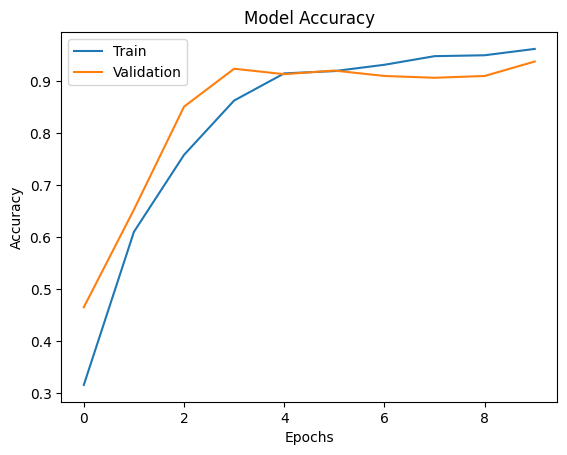

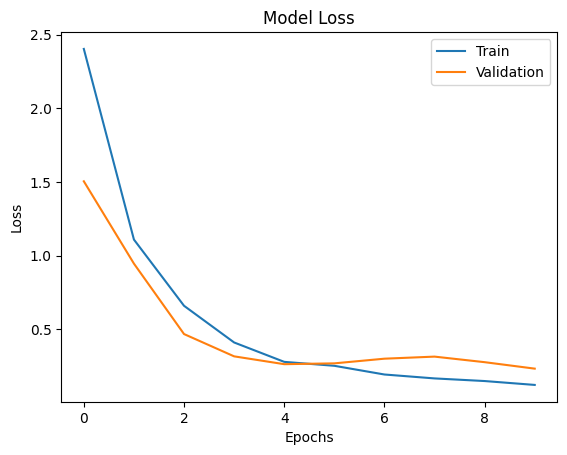

In [53]:
# Train the model and save the history for plotting
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Plotting accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### In the cases where the grid search is too complicated (uses too many parameters) it can be time consuming and randomized search approach can be better to find better fitting options from multiple options.

Exmaple:


```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

data = load_digits()
X = data.data
y = data.target
y = pd.Categorical(y)
y = pd.get_dummies(y).values
class_num = y.shape[1]

from keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import reciprocal
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
num_epochs = 10


def build_model(n_hidden=1, n_neurons=30, activation_fun='relu', neural_optimizer=Adam, learning_rate=3e-3):
    model = Sequential()
    model.add(Dense(n_neurons, input_shape=(X.shape[1],), activation=activation_fun))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation=activation_fun))
    model.add(Dense(class_num, activation='softmax'))
    model.compile(optimizer=neural_optimizer(learning_rate), loss='categorical_crossentropy', metrics=('accuracy'))
    return model

# RANDOMIZED SEARCH
keras_classifier = KerasClassifier(build_model)
# w randomized search mozna dac wiecej kombinacji bo sa sprawdzane losowe z nich
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_classifier, param_distribs, n_iter=10, cv=5)
rnd_search_cv.fit(X_train, y_train, epochs=num_epochs)

best_params_from_random = rnd_search_cv.best_params_
best_model_from_random = rnd_search_cv.best_estimator_
```

